In [9]:
import numpy as np
import os
import pandas as pd
from glob import glob
from os.path import basename

In [10]:
data_dir = "C:/Users/USER/Desktop/Gesture Data"

In [11]:
# Load training data
train_df = pd.read_csv("Train(static)_NoKal.csv")  
# Load testing data
test_df = pd.read_csv("New Data(concat)\Than_NoKal.csv")  

# Separate features (X) and target variable (y) for training data
X_train = train_df.drop(columns=['Gesture', 'Time'])
y_train = train_df['Gesture']

# Separate features (X) and target variable (y) for testing data
X_test = test_df.drop(columns=['Gesture', 'Time'])
y_test = test_df['Gesture']

In [12]:
from micromlgen import port
from sklearn.tree import DecisionTreeClassifier

X = X_train
y = y_train 

model = DecisionTreeClassifier(min_samples_leaf=1, random_state=123).fit(X, y)
print(port(model, classmap={
    0: 'Backward',
    1: 'Down',
    2: 'Forward',
    3: 'Left',
    4: 'Right',
    5: 'Up',
 })) 

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class DecisionTree {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        if (x[6] <= 3.609999895095825) {
                            return 4;
                        }

                        else {
                            if (x[0] <= 2.2200000286102295) {
                                return 3;
                            }

                            else {
                                if (x[8] <= 4.194999933242798) {
                                    if (x[7] <= 5.619999885559082) {
                                        if (x[6] <= 14.644999980926514) {
                                            if (x[9] <= 12.080000400543213) {
                                                if (x[10] <= -7.53000020980835) {
        

In [13]:
X_train.head()

,imu0_ax,imu0_ay,imu0_az,imu1_ax,imu1_ay,imu1_az,imu2_ax,imu2_ay,imu2_az,imu3_ax,imu3_ay,imu3_az
0,12.73,-3.27,-9.43,11.90,2.21,-9.75,15.05,-2.70,-9.29,13.72,-3.35,-9.57
1,12.74,-3.30,-9.43,11.90,2.22,-9.71,15.02,-2.72,-9.32,13.89,-3.18,-9.47
2,12.69,-3.33,-9.39,11.86,2.23,-9.70,15.03,-2.70,-9.39,13.89,-3.18,-9.47
3,12.69,-3.26,-9.36,11.83,2.23,-9.70,14.98,-2.65,-9.43,14.02,-3.15,-9.27
4,12.76,-3.26,-9.37,11.73,2.21,-9.70,14.92,-2.63,-9.35,14.02,-3.15,-9.27


In [14]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

In [15]:
# Evaluate the model on the testing data
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Accuracy: 1.0
Confusion Matrix:
[[2000    0    0    0    0    0]
 [   0 2000    0    0    0    0]
 [   0    0 2000    0    0    0]
 [   0    0    0 2000    0    0]
 [   0    0    0    0 2000    0]
 [   0    0    0    0    0 2000]]


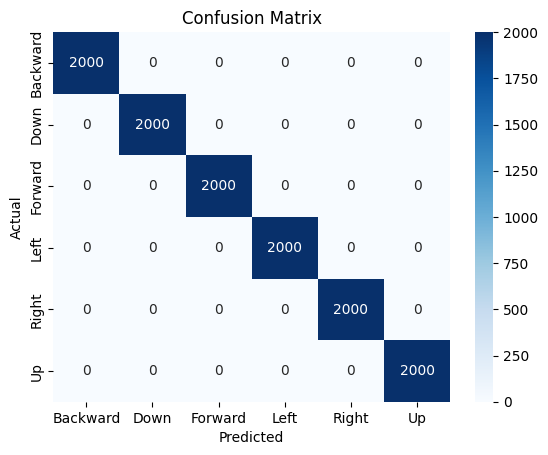

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique class labels
class_labels = sorted(set(y_test))

# Plot the confusion matrix with actual labels
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [18]:
from micromlgen import port

# Generate C code from the trained model
c_code = port(model, classmap={0: 'Backward', 1: 'Down', 2: 'Forward', 3: 'Left', 4: 'Right', 5: 'Up'})

# Print the generated C code
print(c_code)

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class DecisionTree {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        if (x[6] <= 3.609999895095825) {
                            return 4;
                        }

                        else {
                            if (x[0] <= 2.2200000286102295) {
                                return 3;
                            }

                            else {
                                if (x[8] <= 4.194999933242798) {
                                    if (x[7] <= 5.619999885559082) {
                                        if (x[6] <= 14.644999980926514) {
                                            if (x[9] <= 12.080000400543213) {
                                                if (x[10] <= -7.53000020980835) {
        